In [1]:
import csv
import os
from sklearn.cross_decomposition import PLSRegression
from sklearn import svm
from sklearn.svm import SVR
import xgboost as xgb

In [2]:
##Import the modules
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn import preprocessing
import matplotlib.pyplot as plt
#-----------------------------------------------------##
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.kernel_ridge import KernelRidge
from sklearn import ensemble
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel, Matern

In [3]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df1 = pd.read_csv('Descriptor_GaBP2__20_Sep_24.csv')
df1 = df1.round(decimals = 2)
df1.head()

,compound,BandGap,Volume,vand_rad_Avg,vand_rad_Min,vand_rad_Max,cov_rad_Avg,cov_rad_Min,cov_rad_Max,atom_rad_Avg,atom_rad_Min,atom_rad_Max,density_Avg,density_Min,density_Max
0,ZnGeN2,2.44,181.39,168.33,139,211,104.33,71,122,108.33,65,135,4.42,0.81,7.13
1,ZnGeN2,3.02,181.83,168.33,139,211,104.33,71,122,108.33,65,135,4.42,0.81,7.13
2,ZnGeN2,2.73,181.56,168.33,139,211,104.33,71,122,108.33,65,135,4.42,0.81,7.13
3,AlGaN2,4.59,178.46,175.33,155,187,104.67,71,122,106.67,65,130,3.14,0.81,5.91
4,AlGaN2,4.63,178.36,175.33,155,187,104.67,71,122,106.67,65,130,3.14,0.81,5.91


In [5]:
df1.keys()

Index(['compound', 'BandGap', 'Volume', 'vand_rad_Avg', 'vand_rad_Min',
       'vand_rad_Max', 'cov_rad_Avg', 'cov_rad_Min', 'cov_rad_Max',
       'atom_rad_Avg', 'atom_rad_Min', 'atom_rad_Max', 'density_Avg',
       'density_Min', 'density_Max'],
      dtype='object')

# **`Data for Volume`**

In [6]:
df2 =df1.copy()

In [7]:
df2 = df2[['Volume','vand_rad_Avg','vand_rad_Min', 'vand_rad_Max', 'cov_rad_Avg', 'cov_rad_Min',\
       'cov_rad_Max', 'atom_rad_Avg', 'atom_rad_Min', 'atom_rad_Max']]
df2.head()

,Volume,vand_rad_Avg,vand_rad_Min,vand_rad_Max,cov_rad_Avg,cov_rad_Min,cov_rad_Max,atom_rad_Avg,atom_rad_Min,atom_rad_Max
0,181.39,168.33,139,211,104.33,71,122,108.33,65,135
1,181.83,168.33,139,211,104.33,71,122,108.33,65,135
2,181.56,168.33,139,211,104.33,71,122,108.33,65,135
3,178.46,175.33,155,187,104.67,71,122,106.67,65,130
4,178.36,175.33,155,187,104.67,71,122,106.67,65,130


In [8]:
X = df2.drop(['Volume'], axis=1)
Y1= df2['Volume']

In [9]:
X.head()

,vand_rad_Avg,vand_rad_Min,vand_rad_Max,cov_rad_Avg,cov_rad_Min,cov_rad_Max,atom_rad_Avg,atom_rad_Min,atom_rad_Max
0,168.33,139,211,104.33,71,122,108.33,65,135
1,168.33,139,211,104.33,71,122,108.33,65,135
2,168.33,139,211,104.33,71,122,108.33,65,135
3,175.33,155,187,104.67,71,122,106.67,65,130
4,175.33,155,187,104.67,71,122,106.67,65,130


## `LASSO Model`

In [10]:
for n in range (0,20,1):
        X_train, X_test, Y_train, Y_test = train_test_split(X, Y1, test_size =0.25, random_state=n)
        #model = LinearRegression(fit_intercept=True)
        #model = PLSRegression()
        #model = Ridge(alpha=0.0000001, max_iter=10000, tol=0.001)
        #model = Lasso(alpha=0.00001,max_iter=100000)
        model = Lasso(alpha=0.001,max_iter=100000)
        # model = KernelRidge(kernel='polynomial', alpha=0.000000001, degree= 5)
        #model = KernelRidge(kernel='rbf', gamma=0.001, alpha=0.0001)
        #model = GradientBoostingRegressor(n_estimators=500, max_depth = 10, learning_rate=0.01)
        # kernel = C(1.0, (1e-3, 1e3)) * RBF(10, (1e-2, 1e2))
        # model = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=9)
        #model = RandomForestRegressor(n_estimators=1000, max_features=15,max_depth=15,random_state=n)
        #model = RandomForestRegressor(n_estimators=1000, max_features=9,max_depth=15,random_state=n)
        #model = xgb.XGBRegressor(objective="reg:linear",random_state=n,verbosity = 0)
        #model = SVR(gamma='scale', C=8.0, epsilon=0.01)
        model.fit(X_train, Y_train)
     ## ## model evaluation for training set
        from sklearn.metrics import mean_squared_error
        from sklearn.metrics import r2_score
        y_train_predict = model.predict(X_train)
        rmse_train = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
        r2_train = r2_score(Y_train, y_train_predict)
        y_test_predict = model.predict(X_test)
        rmse_test = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
        r2_test = r2_score(Y_test, y_test_predict)
        with open('out.csv', mode='a') as out_file:
            out_writer = csv.writer(out_file, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
            out_writer.writerow(['%s' %n, '{}'.format(rmse_train) ,'{}'.format(r2_train), '{}'.format(rmse_test), '{}'.format(r2_test)])
            out_file.close()
from shutil import copyfile
copyfile('out.csv', 'cross-validation-out.csv')
###here we import the out.csv file and printthe statistics
data_stat=pd.read_csv('out.csv',  names = ["RMSE-Train", "$R^{2}$ train", "RMSE-test", "R$^2$ test"])
print(data_stat.describe())
#Removing out.csv file
try:
    os.remove("out.csv")
except OSError:
    pass

       RMSE-Train  $R^{2}$ train  RMSE-test  R$^2$ test
count   20.000000      20.000000  20.000000   20.000000
mean     7.510361       0.994251   8.571422    0.991805
std      0.407318       0.000573   1.286300    0.002753
min      6.757685       0.993282   6.181813    0.984214
25%      7.202198       0.993820   7.820202    0.989922
50%      7.594861       0.994208   8.418311    0.992429
75%      7.854075       0.994607   9.520703    0.993728
max      8.167222       0.995185  10.532706    0.995947


In [14]:
#      RMSE-Train  $R^{2}$ train  RMSE-test  R$^2$ test
# count   20.000000      20.000000  20.000000   20.000000
# mean     7.510361       0.994251   8.571422    0.991805
# std      0.407318       0.000573   1.286300    0.002753
# min      6.757685       0.993282   6.181813    0.984214
# 25%      7.202198       0.993820   7.820202    0.989922
# 50%      7.594861       0.994208   8.418311    0.992429
# 75%      7.854075       0.994607   9.520703    0.993728
# max      8.167222       0.995185  10.532706    0.995947

In [13]:
######printing coefficient of the regression
try:
#    print ("The Dual coefficients are", np.vstack(model.dual_coef_))
#    coefficient = np.vstack(model.dual_coef_)
    coefficient = model.dual_coef_
    print(coefficient)
#    print(X_1.columns.values.tolist())
    print ("The dual coefficients are written in the file 'dual_coef.txt'")
    with open('dual_coef.txt', mode='a') as out_file:
      out_writer = csv.writer(out_file, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
      out_writer.writerow([X.columns.values.tolist()])
      out_writer.writerow([coefficient])
      out_file.close()
except AttributeError:
    pass
try:
#    print ("The model coefficients are {}", np.vstack(model.coef_))
#    coefficient = np.vstack(model.coef_)
    coefficient = model.coef_
except AttributeError:
    pass
try:
 #   print ("The model coefficients are", np.vstack(model.feature_importances_))
#    coefficient = np.vstack(model.feature_importances_)
    coefficient = model.feature_importances_
except AttributeError:
    pass

try:
    os.remove("co-efficient-out.txt")
except OSError:
    pass
try:
    feature={'features name': X.columns.values.tolist(),
      'coefficient':coefficient}
    df_feature=pd.DataFrame(feature)
    print(df_feature)
    df_feature.to_csv("Feature_vs_coeff.csv")
    print ("Features and their respective Coefficients are written in the file 'Feature_vs_coeff.csv'")
except:
  print ("-------------------------------------------------------------------------------------------")
  print ("-------------------------------------------------------------------------------------------")
  print ("No Coefficient(s) saved for this model")
  pass

  features name  coefficient
0  vand_rad_Avg     7.413725
1  vand_rad_Min    -0.251717
2  vand_rad_Max     1.413283
3   cov_rad_Avg    -4.132643
4   cov_rad_Min     1.835718
5   cov_rad_Max     0.727999
6  atom_rad_Avg     5.813631
7  atom_rad_Min     0.079592
8  atom_rad_Max    -1.434502
Features and their respective Coefficients are written in the file 'Feature_vs_coeff.csv'


In [11]:
#  features name  coefficient
# 0  vand_rad_Avg     7.413725
# 1  vand_rad_Min    -0.251717
# 2  vand_rad_Max     1.413283
# 3   cov_rad_Avg    -4.132643
# 4   cov_rad_Min     1.835718
# 5   cov_rad_Max     0.727999
# 6  atom_rad_Avg     5.813631
# 7  atom_rad_Min     0.079592
# 8  atom_rad_Max    -1.434502

In [15]:
df8 = df_feature.sort_values(by=['coefficient'], ascending=False)
df8 = df8.round(decimals =2)
df8 = df8.sort_values(by=['features name'])
df8

,features name,coefficient
6,atom_rad_Avg,5.81
8,atom_rad_Max,-1.43
7,atom_rad_Min,0.08
3,cov_rad_Avg,-4.13
5,cov_rad_Max,0.73
4,cov_rad_Min,1.84
0,vand_rad_Avg,7.41
2,vand_rad_Max,1.41
1,vand_rad_Min,-0.25


## For reference

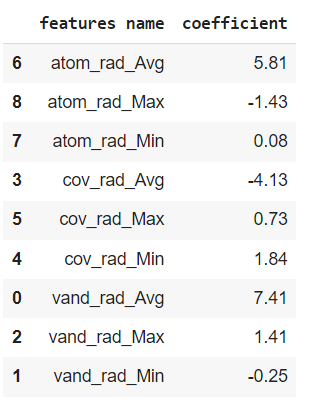

In [16]:
print(model.intercept_)

-1566.4125078230165


Intercept value = -1566.412507823011

## `Justify LASSO Formula`

In [17]:
df9 = df2.copy()
df9.head()

,Volume,vand_rad_Avg,vand_rad_Min,vand_rad_Max,cov_rad_Avg,cov_rad_Min,cov_rad_Max,atom_rad_Avg,atom_rad_Min,atom_rad_Max
0,181.39,168.33,139,211,104.33,71,122,108.33,65,135
1,181.83,168.33,139,211,104.33,71,122,108.33,65,135
2,181.56,168.33,139,211,104.33,71,122,108.33,65,135
3,178.46,175.33,155,187,104.67,71,122,106.67,65,130
4,178.36,175.33,155,187,104.67,71,122,106.67,65,130


In [18]:
df9['Volume_Formula'] = 5.81*df9['atom_rad_Avg']-1.43*df9['atom_rad_Max']+0.08*df9['atom_rad_Min']-4.13*df9['cov_rad_Avg']+0.73*df9['cov_rad_Max']\
                        +1.84*df9['cov_rad_Min']+7.41*df9['vand_rad_Avg']+1.41*df9['vand_rad_Max']-0.25*df9['vand_rad_Min']-1566.41
df9['Volume_Formula'] = df9['Volume_Formula'].round(decimals =2)
df9.head()

,Volume,vand_rad_Avg,vand_rad_Min,vand_rad_Max,cov_rad_Avg,cov_rad_Min,cov_rad_Max,atom_rad_Avg,atom_rad_Min,atom_rad_Max,Volume_Formula
0,181.39,168.33,139,211,104.33,71,122,108.33,65,135,174.04
1,181.83,168.33,139,211,104.33,71,122,108.33,65,135,174.04
2,181.56,168.33,139,211,104.33,71,122,108.33,65,135,174.04
3,178.46,175.33,155,187,104.67,71,122,106.67,65,130,184.17
4,178.36,175.33,155,187,104.67,71,122,106.67,65,130,184.17


In [19]:
rmse_test = (np.sqrt(mean_squared_error(df9['Volume_Formula'], df9['Volume'])))
rmse_test = round(rmse_test,2)
r2_test = r2_score(df9['Volume_Formula'], df9['Volume'])
r2_test = round(r2_test,2)
print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse_test))
print('R$^2$ score is {}'.format(r2_test))

The model performance for testing set
--------------------------------------
RMSE is 7.95
R$^2$ score is 0.99


## For reference

The model performance for testing set  
RMSE is 7.95   
R$^2$ score is 0.99   

In [20]:
df9['Volume'].describe()

count     92.000000
mean     340.970652
std      100.040265
min      164.130000
25%      245.367500
50%      357.890000
75%      401.742500
max      544.540000
Name: Volume, dtype: float64

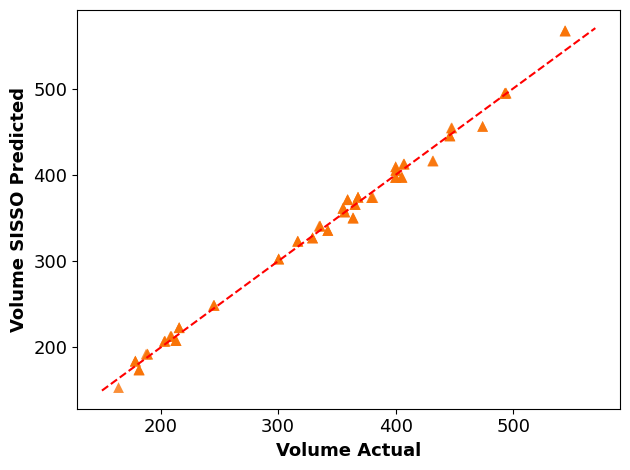

In [21]:
#### define your data plot here
#plt.figure(figsize=(6,5),dpi=300)
#plt.title('XgBoost', fontsize=13)
#### define your data plot here
#plt.xlim((-0.5,2.5))
#plt.xticks(np.linspace(0,2.5,3,endpoint=True))
#plt.ylim((-0.5,2.5))
#plt.yticks(np.linspace(0,2.5,3,endpoint=True))
plt.tick_params(axis='both', which='major', labelsize=13)
plt.scatter(df9['Volume'], df9['Volume_Formula'], facecolors='#F97306',alpha=0.8, edgecolors='none',s=60,marker='^')
#plt.scatter(df1['critical_temp_SISSO'], df1['critical_temp_SISSO'], label='Testing',facecolors='tab:blue',alpha=0.8, edgecolors='none',s=60, marker='o')
plt.xlabel("Volume Actual",fontsize=13, fontweight = 'bold')
plt.ylabel("Volume SISSO Predicted", fontsize=13 , fontweight = 'bold')

#####fitting with a y=x line here (polynomial approach)
p1 = np.polyfit(df9['Volume'], df9['Volume_Formula'],1)
plt.plot((150,570),(150,570), 'r',linestyle='dashed',label='y=x line')
#plt.legend(loc=2, prop={'size': 13}, frameon=True)
#leg = plt.legend()
#leg.get_frame().set_edgecolor('black')
plt.tight_layout()
#plt.text(4, 2, 'RMSE = 0.30 K \n R$^2$ =0.94',fontsize=13)
#plt.savefig ('RFR.eps')
plt.show()

## Use LASSO ML Model for indiviudal state

In [ ]:
print(data_stat.to_string())

    RMSE-Train  $R^{2}$ train  RMSE-test  R$^2$ test
0     7.683467       0.994330   7.978247    0.992359
1     6.766087       0.995073  10.532706    0.989843
2     7.585307       0.993282   8.908147    0.993796
3     7.604415       0.994150   8.186486    0.992456
4     7.693590       0.993708   7.720858    0.994707
5     7.857925       0.994465   7.853317    0.989643
6     7.675156       0.994146   7.904281    0.993157
7     7.852791       0.993664   8.029371    0.992402
8     6.913077       0.994843   9.932198    0.991465
9     7.966776       0.993757   7.030341    0.994461
10    7.202615       0.994267   9.153099    0.992975
11    8.167222       0.993306   6.181813    0.995947
12    7.415956       0.995185   9.081327    0.984214
13    7.967998       0.993841   6.862935    0.994287
14    6.757685       0.995174  10.495894    0.989949
15    7.555176       0.993968   8.650137    0.992950
16    7.867794       0.994054   7.203313    0.993706
17    7.279079       0.994788   9.434690    0.

<div style="padding: 1ex; margin-top: 1ex; margin-bottom: 1ex; border-style: dotted; border-width: 1pt; border-color: blue; border-radius: 3px;">
<b>This section of the script is for an individual random state, which has best fitting (Close to average of R$^2$ and RMSE test i.e. 8.571422, 0.99)</b>

In [22]:
# random_state=15
n=15
X_train, X_test, Y_train, Y_test = train_test_split(X, Y1, test_size = 0.25,random_state=n)
model = Lasso(alpha=0.001,max_iter=100000,random_state=n)
model.fit(X_train, Y_train)

Lasso(alpha=0.001, max_iter=100000, random_state=15)

In [23]:
##### model evaluation for training set
y_train_predict = model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2 = r2_score(Y_train, y_train_predict)
print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R$^2$ score is {}'.format(r2))

The model performance for training set
--------------------------------------
RMSE is 7.555176164263497
R$^2$ score is 0.9939679973332921


The model performance for training set
--------------------------------------
RMSE is 7.555176164263497
R$^2$ score is 0.9939679973332921

In [24]:
# model evaluation for testing set
y_test_predict = model.predict(X_test)
rmse_test = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2_test = r2_score(Y_test, y_test_predict)
print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse_test))
print('R$^2$ score is {}'.format(r2_test))

The model performance for testing set
--------------------------------------
RMSE is 8.650136553128032
R$^2$ score is 0.9929502632126865


The model performance for testing set
--------------------------------------
RMSE is 8.650136553128032
R$^2$ score is 0.9929502632126865

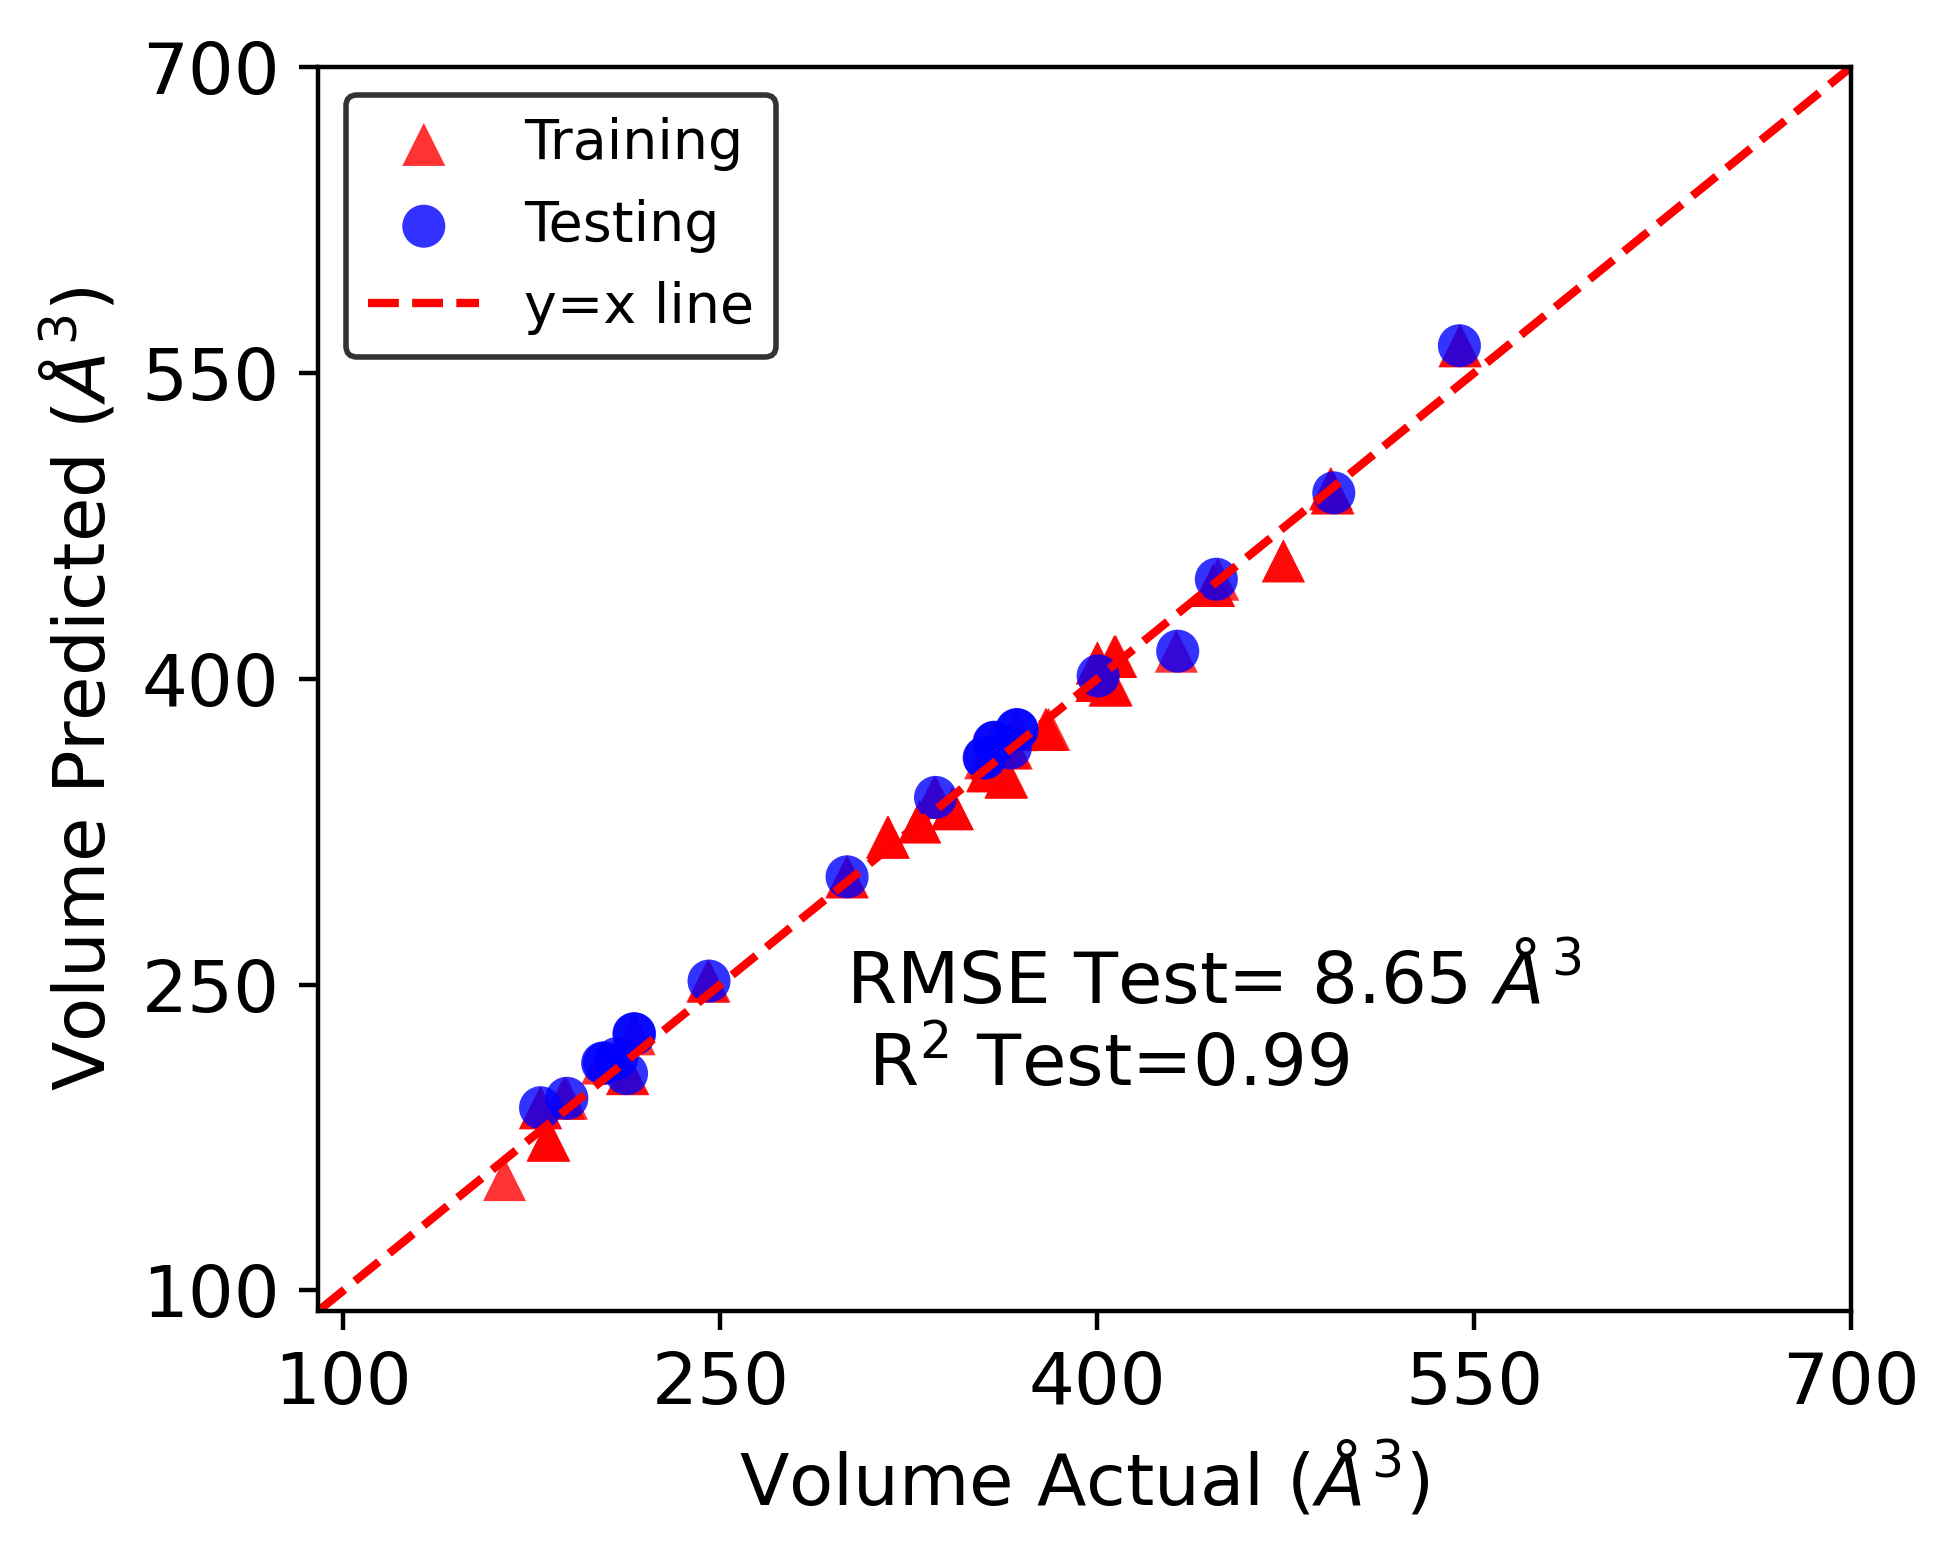

In [25]:
#### define your data plot here
plt.figure(figsize=(5,4),dpi=400)
#plt.title('XgBoost', fontsize=13)
#### define your data plot here
#plt.xlim((-0.5,2.5))
#plt.xticks(np.linspace(0,2.5,3,endpoint=True))
#plt.ylim((-0.5,2.5))
#plt.yticks(np.linspace(0,2.5,3,endpoint=True))
plt.tick_params(axis='both', which='major', labelsize=13)
plt.scatter(Y_train, y_train_predict, label='Training',facecolors='red',alpha=0.8, edgecolors='none',s=60,marker='^')
plt.scatter(Y_test, y_test_predict, label='Testing',facecolors='blue',alpha=0.8, edgecolors='none',s=60, marker='o')
plt.xlabel("Volume Actual ($\AA^3$)",fontsize=13)
plt.ylabel("Volume Predicted ($\AA^3$)", fontsize=13 )
# Define x and y axis limits and tick marks
plt.xlim(90, 700)
plt.xticks(np.arange(100, 701, 150))
plt.ylim(90, 700)
plt.yticks(np.arange(100, 701, 150))
#####fitting with a y=x line here (polynomial approach)
p1 = np.polyfit(Y_train, y_train_predict,1)
plt.plot((50,700),(50,700), 'r',linestyle='dashed',label='y=x line')
plt.legend(loc=2, prop={'size': 13}, frameon=True)
leg = plt.legend()
leg.get_frame().set_edgecolor('black')
plt.tight_layout()
plt.text(300, 200, 'RMSE Test= 8.65 $\AA^3$ \n R$^2$ Test=0.99',fontsize=13)
plt.savefig ('Volume_LASSO.pdf')
plt.show()

In [ ]:
# from google.colab import files
# files.download("Volume_LASSO.pdf")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>